# Predict success of students


In [0]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

os.chdir("/content/drive/My Drive/machine learning/1404")
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'Copie de Food_projection.ipynb'			  Food_projection.ipynb
'food_coded - food_coded - food_coded - food_coded.csv'


In [0]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
bdd = pd.read_csv('food_coded - food_coded - food_coded - food_coded.csv')
import numpy as np
# your code here


In [0]:
bdd.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5,5,5,1,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4,4,4,1,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6,5,5,7,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6,5,5,2,2.0,Grilled chicken \nStuffed Shells\nHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6,2,5,1,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [0]:
bdd.info


<bound method DataFrame.info of        GPA  Gender  ...  waffle_calories                   weight
0    2.400       2  ...             1315                      187
1    3.654       1  ...              900                      155
2    3.300       1  ...              900  I'm not answering this.
3    3.200       1  ...             1315            Not sure, 240
4    3.500       1  ...              760                      190
..     ...     ...  ...              ...                      ...
116  3.500       1  ...             1315                      156
117  3.000       1  ...             1315                      180
118  3.882       1  ...             1315                      120
119  3.000       2  ...             1315                      135
120  3.900       1  ...              575                      135

[121 rows x 61 columns]>

Looks like there are some Nan values, let's see how many for each column

In [0]:
bdd.isnull().sum()

GPA                  0
Gender               0
breakfast            0
calories_chicken     0
calories_day        18
                    ..
type_sports         19
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64

**Cabin** contains a lot of Nan values, we'll drop this column <br>
We'll replace the Nan values in **Age** with the age's median, and the ones in **Embarked** with **'S'**, which is the most frequent one in this column

In [0]:

to_drop =['comfort_food','pay_meal_out','weight','sports','cook','comfort_food_reasons_coded.1',	'cuisine',	'drink','grade_level','vitamins','diet_current_coded', 'employment', 'ethnic_food','fav_cuisine_coded', 'food_childhood','healthy_meal','ideal_diet', 'ideal_diet_coded', 'income', 'marital_status', 'on_off_campus', 'tortilla_calories','persian_food', 'waffle_calories', 'thai_food', 'self_perception_weight', 'self_perception_weight', 'turkey_calories', 'type_sports', 'meals_dinner_friend', 'italian_food', 'indian_food', 'life_rewarding','father_education', 'father_profession', 'fav_food', 'greek_food', 'greek_food', 'mother_education', 'healthy_feeling', 'mother_profession', 'nutritional_check', 'parents_cook','calories_chicken', 'calories_day','calories_scone','comfort_food_reasons','comfort_food_reasons_coded','diet_current', 'eating_changes', 'eating_changes_coded', 'eating_changes_coded1', 'fav_cuisine']
bdd.drop(to_drop, axis = 1, inplace = True)
bdd.head(2)


,GPA,Gender,breakfast,coffee,eating_out,exercise,fries,fruit_day,soup,veggies_day
0,2.400,2,1,1,3,1.0,2,5,1.0,5
1,3.654,1,1,2,2,1.0,1,4,1.0,4


In [0]:
bdd.dropna()

,GPA,Gender,breakfast,coffee,eating_out,exercise,fries,fruit_day,soup,veggies_day
0,2.400,2,1,1,3,1.0,2,5,1.0,5
1,3.654,1,1,2,2,1.0,1,4,1.0,4
2,3.300,1,1,2,2,2.0,1,5,1.0,5
3,3.200,1,1,2,2,3.0,2,4,1.0,3
4,3.500,1,1,2,2,1.0,1,4,1.0,4
...,...,...,...,...,...,...,...,...,...,...
116,3.500,1,1,2,2,2.0,1,5,1.0,5
117,3.000,1,1,2,4,2.0,1,4,1.0,5
118,3.882,1,1,1,3,2.0,1,4,1.0,4
119,3.000,2,1,1,5,1.0,1,5,2.0,3


In [0]:
bdd.isnull().sum()

GPA            0
Gender         0
breakfast      0
coffee         0
eating_out     0
exercise       0
fries          0
fruit_day      0
soup           0
veggies_day    0
dtype: int64

In [0]:

bdd["exercise"].fillna(bdd["exercise"].median(),inplace=True)
bdd["soup"].fillna(bdd["soup"].median(),inplace=True)

In [0]:

bdd.loc[bdd['GPA'] < 3.4, 'GPA'] = 0


In [0]:
bdd.loc[bdd['GPA'] >= 3.4, 'GPA'] = 1

In [0]:
bdd.head(30)

succes rate = 0.6033057851239669


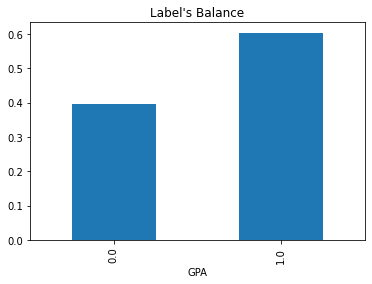

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
print ('succes rate =', bdd.GPA.mean())
(bdd.groupby('GPA').size()/bdd.shape[0]).plot(kind="bar",title="Label's Balance")


In [0]:
# make a function to plot sucess against students attribute
def success_rate(column,t):
    df=pd.DataFrame()
    df['total']=bdd.groupby(column).size()
    df['GPA'] = bdd.groupby(column).sum()['GPA']
    df['percentage'] = round(df['GPA']/df['total']*100,2)
    print(df)

    df['GPA'].plot(kind=t)
    df['total'].plot(kind=t,alpha=0.5,title="Sucess per "+str(column))
    plt.show()

        total   GPA  percentage
coffee                         
1          31  19.0       61.29
2          90  54.0       60.00


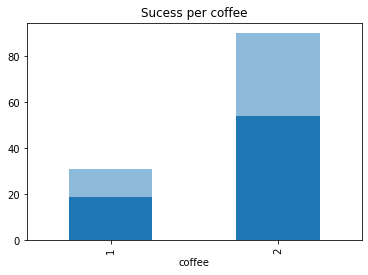

In [0]:
success_rate("coffee","bar")

           total   GPA  percentage
breakfast                         
1            108  66.0       61.11
2             13   7.0       53.85


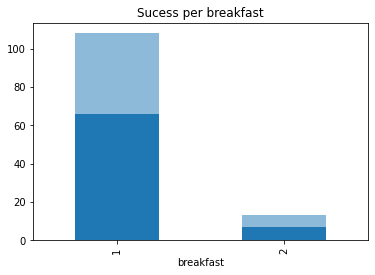

In [0]:
success_rate("breakfast","bar")

           total   GPA  percentage
fruit_day                         
1              1   0.0        0.00
2              4   1.0       25.00
3             22  16.0       72.73
4             32  21.0       65.62
5             62  35.0       56.45


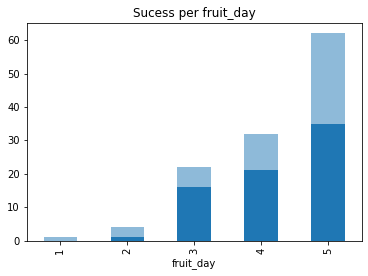

In [0]:

success_rate("fruit_day","bar")

        total   GPA  percentage
sports                         
1.0        74  47.0       63.51
2.0        45  26.0       57.78


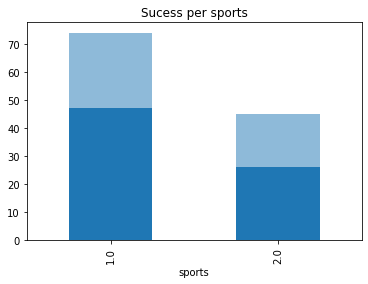

In [0]:

success_rate("sports","bar")

             total   GPA  percentage
veggies_day                         
1                2   1.0       50.00
2               11   6.0       54.55
3               20  10.0       50.00
4               37  25.0       67.57
5               51  31.0       60.78


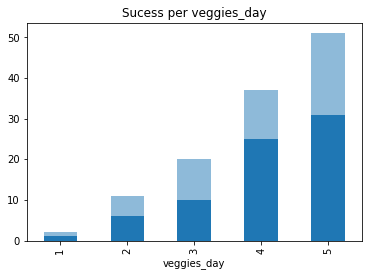

In [0]:
success_rate("veggies_day","bar")


            total   GPA  percentage
eating_out                         
1              16  11.0       68.75
2              58  36.0       62.07
3              23  13.0       56.52
4              12   8.0       66.67
5              12   5.0       41.67


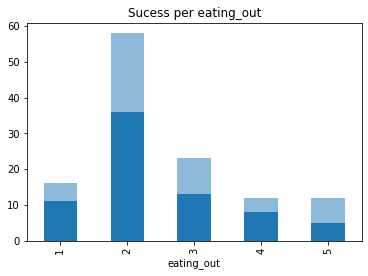

In [0]:
success_rate("eating_out","bar")

      total   GPA  percentage
soup                         
1.0      97  55.0        56.7
2.0      24  18.0        75.0


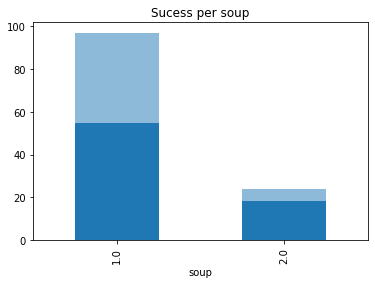

In [0]:
success_rate("soup","bar")

In [0]:
predictors = ["Gender", "coffee", "breakfast", 'fruit_day' ,'veggies_day', 'eating_out', 'soup', 'fries']  

We need now to convert text columns in **predictors** to numerical ones

In [0]:
for col in predictors: # Loop through all columns in predictors
    if bdd[col].dtype == 'object':  # check if column's type is object (text)
        bdd[col] = pd.Categorical(bdd[col]).codes  # convert text to numerical

bdd.head(2)

,GPA,Gender,breakfast,coffee,eating_out,exercise,fries,fruit_day,soup,veggies_day
0,0.0,2,1,1,3,1.0,2,5,1.0,5
1,1.0,1,1,2,2,1.0,1,4,1.0,4


In [0]:
from sklearn.datasets import load_iris
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split

x = bdd[predictors]
y= bdd["GPA"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (84, 8) (84,)
test shape (37, 8) (37,)


In [0]:

from sklearn.datasets import load_iris
from sklearn.linear_model import  LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.5833333333333334
test accuracy = 0.6486486486486487


Let's print the model's parameters

In [0]:
coeff = pd.DataFrame()
coeff['Feature'] = X_train.columns
coeff['Coefficient Estimate'] = pd.Series(clf.coef_[0])
coeff.loc[len(coeff)]=['Intercept',clf.intercept_[0]]
print (coeff)

       Feature  Coefficient Estimate
0       Gender             -0.431906
1       coffee             -0.065521
2    breakfast             -0.179691
3    fruit_day             -0.324511
4  veggies_day              0.254787
5   eating_out             -0.247375
6         soup              0.633046
7        fries             -0.233044
8    Intercept              1.644348


We now need to predict class labels for the test set. We will also generate the class probabilities

In [0]:
# predict class labels for the test set
# your code here
y_pred = clf.predict(X_test)
print (y_pred)

[0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.]


In [0]:

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
print (y_probs)

NameError: ignored

As you can see, the classifier outputs two probabilities for each row. It's predicting a 1 (Success) any time the probability in the second column is greater than 0.5. Let's visualize it all together.

In [0]:
pred = pd.DataFrame({        
        "Success_original": y_test,
        "Success_predicted": y_pred,
        "Success_proba": np.transpose(y_probs)[1]      
        })
pred["Comparison"]= pred.Success_original ==pred.Success_predicted
pred.head(15)

NameError: ignored

## Confusion matrix

In [0]:
from sklearn import metrics
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

[[ 2  8]
 [ 5 22]]
              precision    recall  f1-score   support

         0.0       0.29      0.20      0.24        10
         1.0       0.73      0.81      0.77        27

    accuracy                           0.65        37
   macro avg       0.51      0.51      0.50        37
weighted avg       0.61      0.65      0.63        37



As you can see, we can have the classification report for each class

## K-Fold Cross Validation

In [0]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
model = model.fit (X_train,y_train)
print (model.score(X_test,y_test))


0.6486486486486487


In [0]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
 
print (cross_val)
 
print (cross_val.mean())

NameError: ignored


When you are improving a model, you want to make sur that you are really doing it and not just being lucky. This is why it's good to work with cross validation instead of one train/test split.

In [0]:
predictors = ["Gender", "coffee", "breakfast", 'fruit_day' ,'veggies_day', 'eating_out', 'soup', 'fries']  
my = [2,2,2, 1, 1, 5, 1, 1]
df = pd.DataFrame(np.array(my).reshape(1,-1), columns=predictors)
df.head(5)

,Gender,coffee,breakfast,fruit_day,veggies_day,eating_out,soup,fries
0,2,2,2,1,1,5,1,1


In [0]:
!pip install flask-ngrok
!pip install -U flask-cors

from flask import Flask
from flask import request
from flask_cors import CORS
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
CORS(app)
run_with_ngrok(app)  # Start ngrok when app is run

# for / root, return Hello Word
@app.route("/result/<int:Gender>/<int:coffee>/<int:breakfast>/<int:fruit_day>/<int:veggies_day>/<int:eating_out>/<int:soup>/<int:fries>")
def root(Gender, coffee, breakfast, fruit_day ,veggies_day, eating_out, soup, fries):
    mymy = [Gender, coffee, breakfast, fruit_day, veggies_day, eating_out, soup, fries]
    df = pd.DataFrame(np.array(mymy).reshape(1,-1), columns=predictors)
    clf=LogisticRegression().fit(X_train,y_train)
    return f"{ clf.predict(df)[0]}"

app.run()

Requirement already up-to-date: flask-cors in /usr/local/lib/python3.6/dist-packages (3.0.8)
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://8008e9a8.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [23/Apr/2020 16:53:13] "GET /result/1/2/0/3/3/0/1/5 HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2020 16:53:32] "GET /result/1/1/0/1/3/5/1/5 HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2020 16:55:35] "GET /result/1/2/0/3/3/0/2/1 HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2020 16:55:55] "GET /result/1/1/0/3/1/5/2/3 HTTP/1.1" 200 -
127.0.0.1 - - [23/Apr/2020 17:42:57] "GET /result/1/1/0///// HTTP/1.1" 404 -


In [0]:
clf=LogisticRegression().fit(X_train,y_train)
print(clf.predict(df))
print(clf.predict_proba(df))

NameError: ignored

In [0]:
    mymy = [1,1,1, 1, 2, 3, 3, 1]
    df = pd.DataFrame(np.array(noha).reshape(1,-1), columns=predictors)
    clf=LogisticRegression().fit(X_train,y_train)
   

NameError: ignored